### K-means Clustering
- <a href = "https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1">K-Means</a>
- applied on numerical data which can be divided into clusters
- we minimize the variance in each cluster
- hierarchical clustering??
- (point_1 - mean)^2 + (point_2 - mean)^2 + (point_3 - mean)
^2
- elbow method??
### Working:
- First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster and reasssign each data point to the cluster with the closest centroid. We repeat this

- K-means clustering requires us to select K, the no. of clusters we want to group the data into. The elbow method lets us graph the inertia and visualize the point at which it starts decreasing lineraly. This point is referred to as the 'Elbow' and is a good estimate for best value of K based on it.

### Inertia
- K-Means inertia, also known as the sum of squared error SSE, calculates the sum of distances of all points within a cluster from the centriod of the point. It is the difference between the observed value and the predicted value. It s calculated using the sum of the values minus the means squared.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

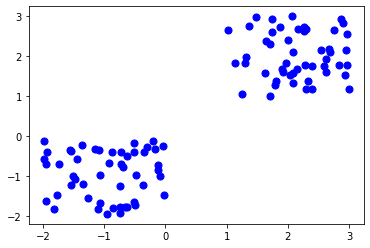

In [37]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

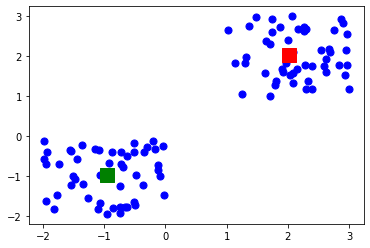

In [39]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

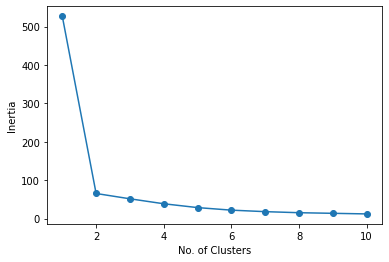

In [40]:
inertia = []
for i in range (1, 11):
  kmeans =KMeans(n_clusters = i )
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

In [41]:
arr=kmeans.cluster_centers_
print(arr)

[[ 2.7935341   2.44078539]
 [-0.87413042 -0.56633009]
 [ 2.57253219  1.57371868]
 [ 1.84969531  2.63577893]
 [-1.58876875 -1.37069495]
 [-0.7743061  -1.74368915]
 [ 1.71203669  1.52781896]
 [-1.71850474 -0.44968456]
 [-0.299648   -0.28027664]
 [-0.19735173 -1.0468537 ]]


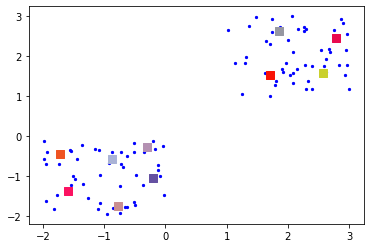

In [42]:
import random
plt.scatter(X[ : , 0], X[ : , 1], s =5, c='b')
for i in range(0,10):
  random_number = random.randint(0,16777215)
  hex_number = str(hex(random_number))
  hex_number ='#'+ hex_number[2:]
  plt.scatter(arr[i][0], arr[i][1], s=50, c=hex_number, marker='s')
plt.show()

In [43]:
kmeans.labels_

array([1, 7, 5, 4, 4, 9, 5, 1, 8, 8, 7, 5, 1, 1, 1, 8, 5, 5, 9, 9, 4, 8,
       7, 7, 7, 4, 8, 8, 9, 7, 9, 1, 5, 1, 5, 9, 8, 4, 5, 5, 4, 7, 1, 5,
       5, 4, 7, 1, 4, 7, 2, 6, 6, 6, 2, 3, 3, 6, 0, 2, 2, 2, 0, 3, 3, 0,
       3, 2, 6, 3, 3, 0, 3, 2, 2, 2, 3, 0, 2, 0, 3, 2, 6, 2, 0, 3, 6, 2,
       3, 3, 3, 6, 0, 6, 6, 6, 3, 6, 6, 6], dtype=int32)

In [44]:
sample_test=np.array([3.0,3.0])
second_test=sample_test.reshape(1, -1)
kmeans.predict(second_test)

array([0], dtype=int32)

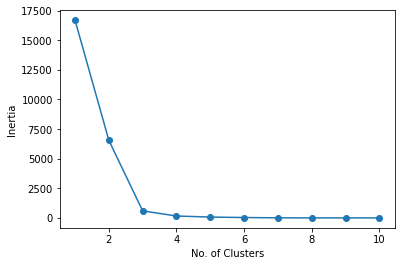

In [29]:
# Elbow method
x = [1, 2, 5, 7, 8, 9, 6, 65, 85, 70]
y = [5, 6, 7, 8, 9, 78, 65, 7, 23, 2]
data = list(zip(x, y))
inertia = []
for i in range (1, 11):
  kmeans =KMeans(n_clusters = i )
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

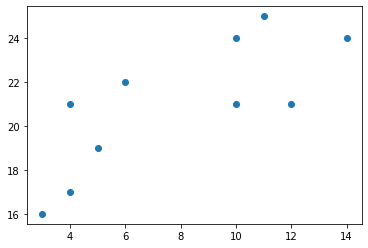

In [45]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]


plt.scatter(x, y)
plt.show()

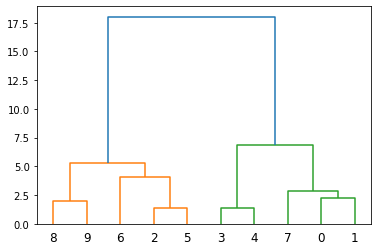

In [50]:
#Compute the ward linkage using euclidean distance, and visualize it using a dendogram
data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

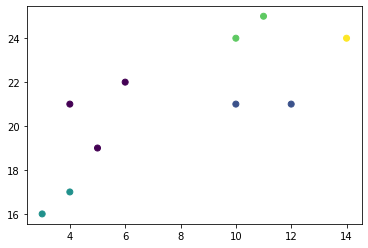

In [58]:
# AgglomerativeClustering
# 2D plot with Python's Scikit-learn library
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()